In [1]:
from mlzero.supervised_learning.k_nearest_neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifierSklearn
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

In [3]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:, :2]
y = iris_dataset.target

n_neighbors = 15

# calculate mesh from the points in the dataset
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

Text(0, 0.5, 'sepal width (cm)')

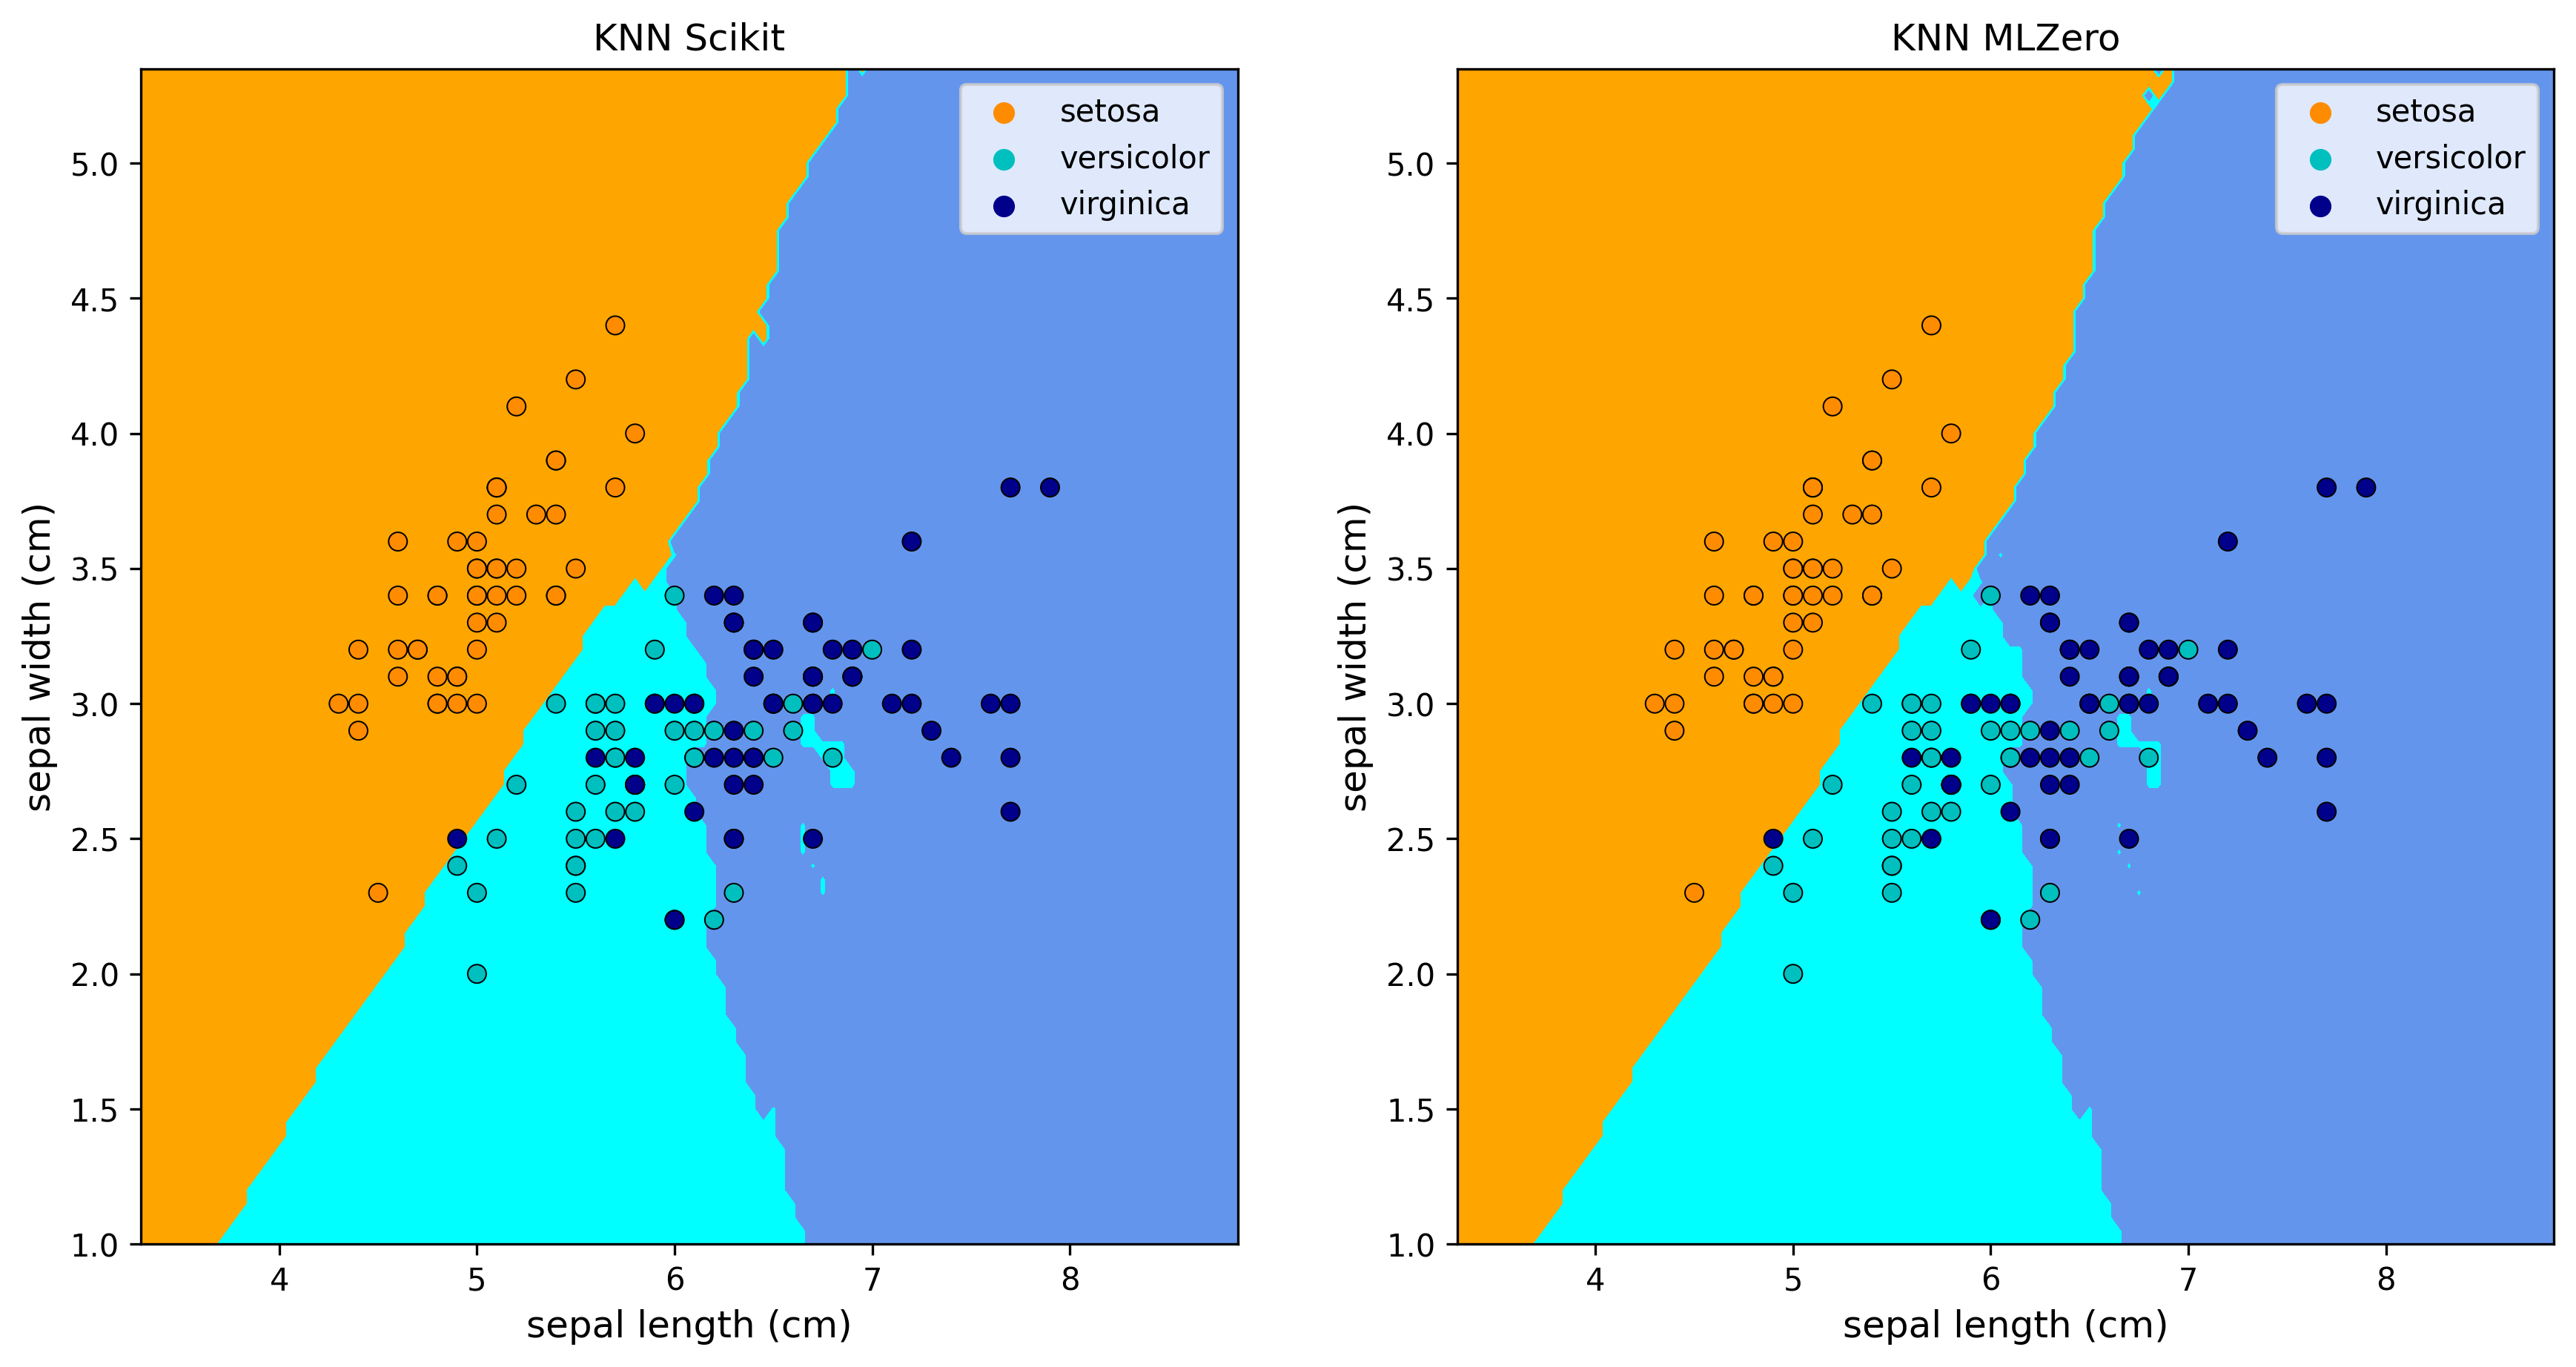

In [4]:
plt.figure(figsize = (14, 7), dpi = 300)

KNN_scikit = KNeighborsClassifierSklearn(n_neighbors = n_neighbors).fit(X, y)
KNN_mlzero = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)


# Plot the decision boundary

plt.subplot(1, 2, 1)

Z = KNN_scikit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris_dataset.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Scikit", fontsize = 12)
plt.xlabel(iris_dataset.feature_names[0], fontsize = 12)
plt.ylabel(iris_dataset.feature_names[1], fontsize = 12)


plt.subplot(1, 2, 2)

Z = KNN_mlzero.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris_dataset.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN MLZero", fontsize = 12)
plt.xlabel(iris_dataset.feature_names[0], fontsize = 12)
plt.ylabel(iris_dataset.feature_names[1], fontsize = 12)